# Saint Malo immo

Resources: ETALAB DVF (Demande de Valeur Foncière)
* http://api.cquest.org/dvf
* https://github.com/etalab/DVF-app
* https://app.dvf.etalab.gouv.fr/

## Access data

In [1]:
import requests as rq
r = rq.get('http://api.cquest.org/dvf?code_commune=35288')
stmalo = r.json()

In [2]:
import json
with open('stmalo.json', 'w') as outfile:
    json.dump(stmalo, outfile, indent=4)

In [3]:
stmalo["nb_resultats"]

15828

## Geo data

- https://www.data.gouv.fr/en/datasets/demandes-de-valeurs-foncieres/
- https://www.data.gouv.fr/fr/datasets/5cc1b94a634f4165e96436c1/

**Index of /geo-dvf/latest/csv/2021/**

- [communes/](https://files.data.gouv.fr/geo-dvf/latest/csv/2021/communes/)
- [departements/](https://files.data.gouv.fr/geo-dvf/latest/csv/2021/departements/)


### communes

In [5]:
import ssl
import pandas as pd
# to avoid SSLCertVerificationError
ssl._create_default_https_context = ssl._create_unverified_context

code_commune = 35288
url = "https://files.data.gouv.fr/geo-dvf/latest/csv/2021/communes/"+str(code_commune)[:2]+"/"+str(code_commune)+".csv"
df = pd.read_csv(url)
df

id_mutation date_mutation  numero_disposition  \
0     2021-155668    2021-01-04                   1   
1     2021-155668    2021-01-04                   1   
2     2021-155678    2021-01-04                   1   
3     2021-155678    2021-01-04                   1   
4     2021-155680    2021-01-04                   1   
...           ...           ...                 ...   
1625  2021-158615    2021-06-11                   1   
1626  2021-158617    2021-06-30                   1   
1627  2021-158617    2021-06-30                   1   
1628  2021-158618    2021-04-26                   1   
1629  2021-158618    2021-04-26                   1   

                         nature_mutation  valeur_fonciere  adresse_numero  \
0                                  Vente         170270.0            14.0   
1                                  Vente         170270.0            16.0   
2     Vente en l'état futur d'achèvement         265000.0            18.0   
3     Vente en l'état futur d'achèvement         265000.0            18.0   
4                                  Vente         152000.0            35.0   
...                                  ...              ...             ...   
1625                               Vente         435000.0            33.0   
1626                               Vente         446200.0            25.0   
1627                               Vente         446200.0            25.0   
1628                               Vente         110000.0            12.0   
1629                               Vente         110000.0            12.0   

     adresse_suffixe     adresse_nom_voie adresse_code_voie  code_postal  ...  \
0                NaN    ALL DE RIVASSELOU              7370        35400  ...   
1                NaN    ALL DE RIVASSELOU              7370        35400  ...   
2                NaN      RUE CONSTANTINE              2000        35400  ...   
3                NaN      RUE CONSTANTINE              2000        35400  ...   
4                NaN     RUE ERNEST RENAN              2880        35400  ...   
...              ...                  ...               ...          ...  ...   
1625             NaN         RUE NOGUETTE              6020        35400  ...   
1626             NaN  AV WALDECK ROUSSEAU              9090        35400  ...   
1627             NaN  AV WALDECK ROUSSEAU              9090        35400  ...   
1628             NaN     RUE BOUGAINVILLE              0990        35400  ...   
1629             NaN     RUE BOUGAINVILLE              0990        35400  ...   

       type_local surface_reelle_bati  nombre_pieces_principales  \
0      Dépendance                 NaN                        0.0   
1     Appartement                49.0                        2.0   
2             NaN                 NaN                        NaN   
3             NaN                 NaN                        NaN   
4      Dépendance                 NaN                        0.0   
...           ...                 ...                        ...   
1625       Maison               112.0                        5.0   
1626   Dépendance                 NaN                        0.0   
1627       Maison                66.0                        3.0   
1628  Appartement                18.0                        1.0   
1629   Dépendance                 NaN                        0.0   

      code_nature_culture  nature_culture code_nature_culture_speciale  \
0                     NaN             NaN                          NaN   
1                     NaN             NaN                          NaN   
2                     NaN             NaN                          NaN   
3                     NaN             NaN                          NaN   
4                     NaN             NaN                          NaN   
...                   ...             ...                          ...   
1625                    S            sols                          NaN   
1626                    S            s

In [7]:
df['latitude'][0], df['longitude'][0]

(48.657138, -1.986727)

<AxesSubplot:>

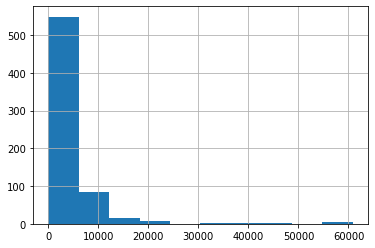

In [21]:
df.prixm2.hist()

In [22]:
# url = "https://files.data.gouv.fr/geo-dvf/latest/csv/2021/communes/"+str(code_commune)[:2]+"/"+str(code_commune)+".csv"
# df = pd.read_csv(url)
df.date_mutation = pd.to_datetime(df.date_mutation).dt.date
df = df.dropna(subset=['valeur_fonciere','surface_reelle_bati'])
df['prixm2'] = df.valeur_fonciere/df.surface_reelle_bati
df = df[df.prixm2<10000] 
df.prixm2 = df.prixm2.astype(int)
df['marker_color'] = pd.cut(df['prixm2'], bins=4,labels=['blue','green', 'yellow', 'red'])
df = df.sort_values(by='date_mutation',ascending=False)
df

id_mutation date_mutation  numero_disposition nature_mutation  \
1587  2021-158543    2021-06-30                   1           Vente   
1542  2021-158510    2021-06-30                   1           Vente   
1617  2021-158597    2021-06-30                   1           Vente   
1601  2021-158576    2021-06-30                   1           Vente   
1469  2021-158402    2021-06-30                   1           Vente   
...           ...           ...                 ...             ...   
7     2021-155694    2021-01-04                   1           Vente   
93    2021-155862    2021-01-04                   1           Vente   
34    2021-155732    2021-01-04                   1           Vente   
38    2021-155739    2021-01-04                   1           Vente   
1     2021-155668    2021-01-04                   1           Vente   

      valeur_fonciere  adresse_numero adresse_suffixe  \
1587         200000.0            16.0             NaN   
1542         117000.0            55.0             NaN   
1617         112000.0            53.0             NaN   
1601         258150.0            75.0             NaN   
1469        1700000.0          9005.0             NaN   
...               ...             ...             ...   
7            250000.0            64.0               B   
93           340000.0            28.0             NaN   
34           155000.0            32.0             NaN   
38           276000.0            28.0             NaN   
1            170270.0            16.0             NaN   

             adresse_nom_voie adresse_code_voie  code_postal  ...  \
1587  RUE DE LA CORNE DE CERF              2070        35400  ...   
1542          RUE VILLE PEPIN              9020        35400  ...   
1617         RUE BOUGAINVILLE              0990        35400  ...   
1601          RUE VILLE PEPIN              9020        35400  ...   
1469     IMP DE LA PEUPLERAIE              6463        35400  ...   
...                       ...               ...          ...  ...   
7          AV ARISTIDE BRIAND              0370        35400  ...   
93                   BD POREE              6880        35400  ...   
34           RUE CLAUDE MONET              1830        35400  ...   
38                   BD POREE              6880        35400  ...   
1           ALL DE RIVASSELOU              7370        35400  ...   

      nombre_pieces_principales code_nature_culture  nature_culture  \
1587                        3.0                 NaN             NaN   
1542                        2.0                 NaN             NaN   
1617                        2.0                 NaN             NaN   
1601                        3.0                 NaN             NaN   
1469                        0.0                   S            sols   
...                         ...                 ...             ...   
7                           3.0                 NaN             NaN   
93                          4.0                 NaN             NaN   
34                          4.0                   S            sols   
38                          4.0                 NaN             NaN   
1                           2.0                 NaN             NaN   

      code_nature_culture_speciale  nature_culture_speciale surface_terrain  \
1587                           NaN                      NaN             NaN   
1542                           NaN                      NaN             NaN   
1617                           NaN                      NaN             NaN   
1601                           NaN                      NaN             NaN   
1469                           NaN                      NaN          1938.0   
...                            ...                      ...             ...   
7                              NaN                      NaN             NaN   
93                             NaN                      NaN             NaN   
34                             NaN                      NaN           107.0

In [23]:
import immo
map = immo.mapplot(df)
map

### departements

In [3]:
import pandas as pd
df = pd.read_csv("35.csv")
df

d:\devel\immo\env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id_mutation date_mutation  numero_disposition nature_mutation  \
0      2021-145045    2021-01-07                   1           Vente   
1      2021-145045    2021-01-07                   1           Vente   
2      2021-145046    2021-01-06                   1           Vente   
3      2021-145047    2021-01-07                   1           Vente   
4      2021-145047    2021-01-07                   1           Vente   
...            ...           ...                 ...             ...   
33653  2021-159844    2021-06-30                   1           Vente   
33654  2021-159844    2021-06-30                   1           Vente   
33655  2021-159844    2021-06-30                   1           Vente   
33656  2021-159844    2021-06-30                   1           Vente   
33657  2021-159844    2021-06-30                   1           Vente   

       valeur_fonciere  adresse_numero adresse_suffixe  \
0             160000.0             7.0             NaN   
1             160000.0             7.0             NaN   
2             225000.0             6.0             NaN   
3             304000.0            12.0             NaN   
4             304000.0            12.0             NaN   
...                ...             ...             ...   
33653          68000.0             NaN             NaN   
33654          68000.0             NaN             NaN   
33655          68000.0           104.0             NaN   
33656          68000.0           104.0             NaN   
33657          68000.0             NaN             NaN   

             adresse_nom_voie adresse_code_voie  code_postal  ...  \
0      RUE BEAUGEARD LANCELOT              0750      35700.0  ...   
1      RUE BEAUGEARD LANCELOT              0750      35700.0  ...   
2            BD DES METAIRIES              0432      35510.0  ...   
3          ALL EMILE GERNIGON              0963      35136.0  ...   
4          ALL EMILE GERNIGON              0963      35136.0  ...   
...                       ...               ...          ...  ...   
33653                BELLEVUE              B028      35500.0  ...   
33654                BELLEVUE              B028      35500.0  ...   
33655                BELLEVUE              B028      35500.0  ...   
33656                BELLEVUE              B028      35500.0  ...   
33657            LA FLEURIAIS              B338      35500.0  ...   

        type_local surface_reelle_bati  nombre_pieces_principales  \
0       Dépendance                 NaN                        0.0   
1      Appartement                55.0                        3.0   
2      Appartement                81.0                        4.0   
3       Dépendance                 NaN                        0.0   
4           Maison                96.0                        4.0   
...            ...                 ...                        ...   
33653          NaN                 NaN                        NaN   
33654          NaN                 NaN                        NaN   
33655       Maison                88.0                        4.0   
33656       Maison                88.0                        4.0   
33657          NaN                 NaN                        NaN   

       code_nature_culture  nature_culture code_nature_culture_speciale  \
0                      NaN             NaN                          NaN   
1                      NaN             NaN                          NaN   
2                      NaN             NaN                          NaN   
3                      NaN             NaN                          NaN   
4                      NaN             NaN                          NaN   
...                    ...             ...                          ...   
33653                    S            sols                          NaN   
33654                    J         jardins                        POTAG   
33655                    S            sols                          NaN   
33656                    J         ja

In [4]:
df.keys()

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [5]:
df[df["code_commune"]==35288]

id_mutation date_mutation  numero_disposition  \
24158  2021-155668    2021-01-04                   1   
24159  2021-155668    2021-01-04                   1   
24178  2021-155678    2021-01-04                   1   
24179  2021-155678    2021-01-04                   1   
24182  2021-155680    2021-01-04                   1   
...            ...           ...                 ...   
30733  2021-158615    2021-06-11                   1   
30735  2021-158617    2021-06-30                   1   
30736  2021-158617    2021-06-30                   1   
30737  2021-158618    2021-04-26                   1   
30738  2021-158618    2021-04-26                   1   

                          nature_mutation  valeur_fonciere  adresse_numero  \
24158                               Vente         170270.0            14.0   
24159                               Vente         170270.0            16.0   
24178  Vente en l'état futur d'achèvement         265000.0            18.0   
24179  Vente en l'état futur d'achèvement         265000.0            18.0   
24182                               Vente         152000.0            35.0   
...                                   ...              ...             ...   
30733                               Vente         435000.0            33.0   
30735                               Vente         446200.0            25.0   
30736                               Vente         446200.0            25.0   
30737                               Vente         110000.0            12.0   
30738                               Vente         110000.0            12.0   

      adresse_suffixe     adresse_nom_voie adresse_code_voie  code_postal  \
24158             NaN    ALL DE RIVASSELOU              7370      35400.0   
24159             NaN    ALL DE RIVASSELOU              7370      35400.0   
24178             NaN      RUE CONSTANTINE              2000      35400.0   
24179             NaN      RUE CONSTANTINE              2000      35400.0   
24182             NaN     RUE ERNEST RENAN              2880      35400.0   
...               ...                  ...               ...          ...   
30733             NaN         RUE NOGUETTE              6020      35400.0   
30735             NaN  AV WALDECK ROUSSEAU              9090      35400.0   
30736             NaN  AV WALDECK ROUSSEAU              9090      35400.0   
30737             NaN     RUE BOUGAINVILLE              0990      35400.0   
30738             NaN     RUE BOUGAINVILLE              0990      35400.0   

       ...   type_local surface_reelle_bati  nombre_pieces_principales  \
24158  ...   Dépendance                 NaN                        0.0   
24159  ...  Appartement                49.0                        2.0   
24178  ...          NaN                 NaN                        NaN   
24179  ...          NaN                 NaN                        NaN   
24182  ...   Dépendance                 NaN                        0.0   
...    ...          ...                 ...                        ...   
30733  ...       Maison               112.0                        5.0   
30735  ...   Dépendance                 NaN                        0.0   
30736  ...       Maison                66.0                        3.0   
30737  ...  Appartement                18.0                        1.0   
30738  ...   Dépendance                 NaN                        0.0   

       code_nature_culture  nature_culture code_nature_culture_speciale  \
24158                  NaN             NaN                          NaN   
24159                  NaN             NaN                          NaN   
24178                  NaN             NaN                          NaN   
24179                  NaN             NaN                          NaN   
24182                  NaN             NaN                          NaN   
...                    ...             ...                          ...   
30733                    S            sols                

## Full data

https://www.data.gouv.fr/en/datasets/demandes-de-valeurs-foncieres/

In [26]:
import pandas as pd
data = pd.read_csv("data/valeursfoncieres-2020.txt",delimiter="|")
data

d:\devel\immo\env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
0                    NaN                 NaN             NaN             NaN   
1                    NaN                 NaN             NaN             NaN   
2                    NaN                 NaN             NaN             NaN   
3                    NaN                 NaN             NaN             NaN   
4                    NaN                 NaN             NaN             NaN   
...                  ...                 ...             ...             ...   
3149477              NaN                 NaN             NaN             NaN   
3149478              NaN                 NaN             NaN             NaN   
3149479              NaN                 NaN             NaN             NaN   
3149480              NaN                 NaN             NaN             NaN   
3149481              NaN                 NaN             NaN             NaN   

         3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
0                   NaN             NaN             NaN               1   
1                   NaN             NaN             NaN               1   
2                   NaN             NaN             NaN               1   
3                   NaN             NaN             NaN               1   
4                   NaN             NaN             NaN               1   
...                 ...             ...             ...             ...   
3149477             NaN             NaN             NaN               1   
3149478             NaN             NaN             NaN               1   
3149479             NaN             NaN             NaN               1   
3149480             NaN             NaN             NaN               1   
3149481             NaN             NaN             NaN               1   

        Date mutation Nature mutation  ... Surface Carrez du 5eme lot  \
0          07/01/2020           Vente  ...                        NaN   
1          02/01/2020           Vente  ...                        NaN   
2          02/01/2020           Vente  ...                        NaN   
3          02/01/2020           Vente  ...                        NaN   
4          02/01/2020           Vente  ...                        NaN   
...               ...             ...  ...                        ...   
3149477    16/12/2020           Vente  ...                        NaN   
3149478    16/12/2020           Vente  ...                        NaN   
3149479    16/12/2020           Vente  ...                        NaN   
3149480    16/12/2020           Vente  ...                        NaN   
3149481    08/10/2020    Adjudication  ...                        NaN   

         Nombre de lots Code type local   Type local Identifiant local  \
0                     0             NaN          NaN               NaN   
1                     0             NaN          NaN               NaN   
2                     0             NaN          NaN               NaN   
3                     0             NaN          NaN               NaN   
4                     0             NaN          NaN               NaN   
...                 ...             ...          ...               ...   
3149477               0             2.0  Appartement               NaN   
3149478               0             2.0  Appartement               NaN   
3149479               0             2.0  Appartement               NaN   
3149480               0             2.0  Appartement               NaN   
3149481               2             2.0  Appartement               NaN   

        Surface reelle bati  Nombre pieces principales Nature culture  \
0                       NaN                        NaN              T   
1                       NaN                        NaN             BT   
2                       NaN                        NaN              T   
3                       NaN                        NaN              T   
4               

In [27]:
data.keys()

Index(['Code service CH', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [36]:
df = data[data['Code postal'] == 35400]
df

Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
1110149              NaN                 NaN             NaN             NaN   
1110150              NaN                 NaN             NaN             NaN   
1110156              NaN                 NaN             NaN             NaN   
1110157              NaN                 NaN             NaN             NaN   
1110169              NaN                 NaN             NaN             NaN   
...                  ...                 ...             ...             ...   
1122132              NaN                 NaN             NaN             NaN   
1122133              NaN                 NaN             NaN             NaN   
1122134              NaN                 NaN             NaN             NaN   
1122136              NaN                 NaN             NaN             NaN   
1122137              NaN                 NaN             NaN             NaN   

         3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
1110149             NaN             NaN             NaN               1   
1110150             NaN             NaN             NaN               1   
1110156             NaN             NaN             NaN               1   
1110157             NaN             NaN             NaN               1   
1110169             NaN             NaN             NaN               1   
...                 ...             ...             ...             ...   
1122132             NaN             NaN             NaN               1   
1122133             NaN             NaN             NaN               1   
1122134             NaN             NaN             NaN               1   
1122136             NaN             NaN             NaN               1   
1122137             NaN             NaN             NaN               1   

        Date mutation Nature mutation  ... Surface Carrez du 5eme lot  \
1110149    06/01/2020           Vente  ...                        NaN   
1110150    06/01/2020           Vente  ...                        NaN   
1110156    06/01/2020           Vente  ...                        NaN   
1110157    06/01/2020           Vente  ...                        NaN   
1110169    10/01/2020           Vente  ...                        NaN   
...               ...             ...  ...                        ...   
1122132    25/05/2020           Vente  ...                        NaN   
1122133    25/05/2020           Vente  ...                        NaN   
1122134    25/05/2020           Vente  ...                        NaN   
1122136    15/12/2020           Vente  ...                        NaN   
1122137    30/12/2020           Vente  ...                        NaN   

         Nombre de lots Code type local   Type local Identifiant local  \
1110149               1             3.0   Dépendance               NaN   
1110150               2             2.0  Appartement               NaN   
1110156               1             3.0   Dépendance               NaN   
1110157               1             2.0  Appartement               NaN   
1110169               1             3.0   Dépendance               NaN   
...                 ...             ...          ...               ...   
1122132               1             3.0   Dépendance               NaN   
1122133               1             2.0  Appartement               NaN   
1122134               1             3.0   Dépendance               NaN   
1122136               1             2.0  Appartement               NaN   
1122137               1             2.0  Appartement               NaN   

        Surface reelle bati  Nombre pieces principales Nature culture  \
1110149                 0.0                        0.0            NaN   
1110150                85.0                        3.0            NaN   
1110156                 0.0                        0.0            NaN   
1110157                66.0                        3.0            NaN   
1110169         

## Process data

In [5]:
import immo
json_data = immo.dvf_commune(35288)

In [50]:
def dvf_postcode(code_postal):
    # dvf_commune(35400)
    import urllib
    import json    
    try:
        url = "http://api.cquest.org/dvf?code_postal="+str(code_postal)
        response = urllib.request.urlopen(url)
        html = response.read()
        json_data = json.loads(html)
        
    except urllib.error.URLError:
        print("Erreur")
          
    return json_data


In [51]:
dvf_postcode(35400)

{'source': 'DGFIP / Demande de Valeurs Foncières',
 'derniere_maj': '2020-04',
 'licence': 'http://data.cquest.org/dgfip_dvf/conditions-generales-dutilisation.pdf',
 'nb_resultats': 15702,
 'resultats': [{'code_service_ch': None,
   'reference_document': None,
   'articles_1': None,
   'articles_2': None,
   'articles_3': None,
   'articles_4': None,
   'articles_5': None,
   'numero_disposition': '000001',
   'date_mutation': '2014-01-10',
   'nature_mutation': 'Vente',
   'valeur_fonciere': 51000,
   'numero_voie': None,
   'suffixe_numero': None,
   'type_voie': None,
   'code_voie': 'C215',
   'voie': 'LA PIECE DE LA NAVIERE',
   'code_postal': '35400',
   'commune': 'SAINT-MALO',
   'code_departement': '35',
   'code_commune': '35288',
   'prefixe_section': None,
   'section': 'DH',
   'numero_plan': '35288000DH0269',
   'numero_volume': None,
   'lot_1': None,
   'surface_lot_1': None,
   'lot_2': None,
   'surface_lot_2': None,
   'lot_3': None,
   'surface_lot_3': None,
   'lot

In [52]:
import requests as rq
r = rq.get('http://api.cquest.org/dvf?code_postal=35400')
stmalo = r.json()
stmalo["nb_resultats"]

15702

In [8]:
import pandas as pd
data = immo.parse_dvf(json_data)
# nb_res = json_data['nb_resultats']
# json_data['resultats'][1]['date_mutation']
df1 = pd.DataFrame.from_dict(data)
df1

date_mutation  valeur_fonciere type_voie               voie  surface  \
0       2016-12-21         237500.0        AV     DE LA HOGUETTE       70   
1       2014-07-10         165100.0        BD             HEBERT       45   
2       2019-04-08         259892.0        BD             HEBERT       44   
3       2019-04-08         528300.0        BD             HEBERT       42   
4       2019-04-08         528300.0        BD             HEBERT       40   
...            ...              ...       ...                ...      ...   
4876    2018-09-18         240000.0       RUE  DE BELLE FONTAINE       37   
4877    2018-10-18         554000.0      None         LA GODELLE       64   
4878    2018-10-18         554000.0      None         LA GODELLE       84   
4879    2018-10-18         554000.0      None         LA GODELLE       84   
4880    2018-10-18         554000.0      None         LA GODELLE       64   

      piece        lat       lon  
0         3  48.658740 -1.997324  
1         2  48.659739 -1.995032  
2         2  48.660952 -1.992934  
3         2  48.660952 -1.992934  
4         2  48.660952 -1.992934  
...     ...        ...       ...  
4876      2  48.645153 -1.986049  
4877      3  48.643277 -1.972155  
4878      4  48.643277 -1.972155  
4879      4  48.643277 -1.972155  
4880      3  48.643277 -1.972155  

[4881 rows x 8 columns]

In [9]:
df2 = immo.parse_dvf2(json_data)
df2

date_mutation  valeur_fonciere type_voie                 voie  surface  \
732     2019-06-29         105000.0       RUE     DU POINT DU JOUR       15   
2739    2019-06-28         135000.0       RUE           DE TRICHET       53   
1195    2019-06-28         140000.0       RUE             DU BOYER       44   
1213    2019-06-28         220000.0       RUE      JACQUES CARTIER       80   
3697    2019-06-28         114000.0       RUE       DES MARAICHERS       46   
...            ...              ...       ...                  ...      ...   
2662    2014-01-09         143000.0       RUE      DES BAS SABLONS       75   
1143    2014-01-08          90000.0        PL  DE LA CROIX DU FIEF       50   
1304    2014-01-03         162000.0       RUE       DE L INDUSTRIE       52   
39      2014-01-03         240000.0        AV           DES SAPINS       78   
4871    2014-01-02          50000.0       RUE   MONTAGNE ST JOSEPH       50   

      piece        lat       lon  prixm2 marker_color  
732       1  48.648236 -2.027307    7000       yellow  
2739      2  48.640464 -2.017725    2547        green  
1195      2  48.649103 -2.027711    3181        green  
1213      3  48.649342 -2.023949    2750        green  
3697      2  48.634502 -2.003568    2478        green  
...     ...        ...       ...     ...          ...  
2662      3  48.638053 -2.018353    1906         blue  
1143      1  48.649955 -2.024316    1800         blue  
1304      2  48.652411 -2.013327    3115        green  
39        3  48.661112 -1.993375    3076        green  
4871      3  48.645427 -1.984688    1000         blue  

[4468 rows x 10 columns]

<AxesSubplot:>

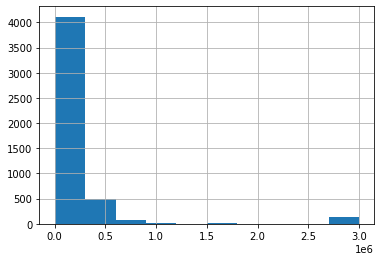

In [10]:
df1.valeur_fonciere.hist()

<AxesSubplot:>

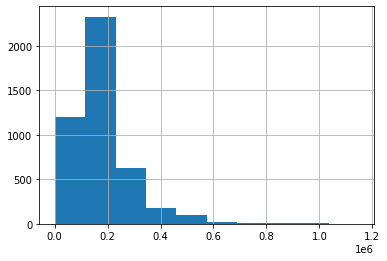

In [11]:
df2.valeur_fonciere.hist()

Data downloaded from https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/$YEAR/full.csv.gz with $YEAR = 2019 & 2020

## Filter

In [20]:
df3 = df2[df2.surface > 80]
df3

date_mutation  valeur_fonciere type_voie                voie  surface  \
1729    2019-06-28         750000.0       CHS           DU SILLON       93   
870     2019-06-28         965000.0       RUE            VAUBOREL      146   
1987    2019-06-27         138000.0       RUE            DU PEROU       87   
2527    2019-06-26         365000.0       RUE        AMIRAL MAGON      107   
185     2019-06-25         410000.0       RUE     JEAN LEGATELOIS       92   
...            ...              ...       ...                 ...      ...   
2402    2014-02-07         250000.0       RUE  GEORGES CLEMENCEAU      132   
1491    2014-01-21          95000.0        BD   VILLEBOIS MAREUIL      100   
4260    2014-01-20          70000.0       RUE      DE LA GARDELLE      120   
622     2014-01-17         200000.0        PL           DU CANADA       85   
3273    2014-01-10         128000.0        BD            DOUVILLE      103   

      piece        lat       lon  prixm2 marker_color  
1729      4  48.653474 -2.010716    8064          red  
870       4  48.646162 -2.027853    6609       yellow  
1987      4  48.640161 -1.994489    1586         blue  
2527      5  48.637822 -2.018596    3411        green  
185       4  48.659934 -1.989482    4456        green  
...     ...        ...       ...     ...          ...  
2402      6  48.640851 -2.019145    1893         blue  
1491      0  48.650635 -2.007515     950         blue  
4260      0  48.656684 -1.983289     583         blue  
622       4  48.681300 -1.968213    2352         blue  
3273      0  48.630527 -2.008855    1242         blue  

[570 rows x 10 columns]

## Visualize

In [23]:
import folium
map1 = folium.Map(
    location=[48.653769,-2.0058249],
    tiles='cartodbpositron',
    zoom_start=14,
)
df3.apply(lambda row:folium.Marker(location=[row["lat"], row["lon"]],
popup=str(row['date_mutation'])+" "+str(row['type_voie'])+" "+str(row['voie'])+" "+str(row['valeur_fonciere'])+" euros / "+str(row['surface'])+" m2",
tooltip=row['prixm2']).add_to(map1), axis=1)
map1

In [24]:
# map1.save("stmalo-2014-2019-surface-sup-80.html")

In [41]:
map2 = folium.Map(
    location=[48.653769,-2.0058249],
    tiles='cartodbpositron',
    zoom_start=14,
)
for index, row in df3.iterrows():
    folium.CircleMarker([row['lat'], row['lon']], radius=15, color=row['marker_color']).add_to(map2)
  
map2

In [47]:
import immo
map2 = immo.mapplot2(df3)
map2

In [48]:
map2.save("stmalo-2014-2019-surface-sup-80.html")

In [18]:
import importlib
importlib.reload(immo)

<module 'immo' from 'd:\\devel\\immo\\immo-saint-malo\\immo.py'>